In [49]:
#import libraries 
import numpy as np # Import NumPy to use np.random.uniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [50]:
filepath = "../Project1_Group7/MovieData_Clean.csv"
df = pd.read_csv(filepath)
(df)

,Movie_Title,Released_Year,Rating,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,No_of_Votes,Gross,Num_Genres
0,The Shawshank Redemption,1994,R,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,2343110,28341469,1
1,The Godfather,1972,R,175,Crime,9.2,100.0,Francis Ford Coppola,Marlon Brando,1620367,134966411,2
2,The Dark Knight,2008,PG-13,152,Action,9.0,84.0,Christopher Nolan,Christian Bale,2303232,534858444,3
3,The Godfather: Part II,1974,R,202,Crime,9.0,90.0,Francis Ford Coppola,Al Pacino,1129952,57300000,2
4,12 Angry Men,1957,G,96,Crime,9.0,96.0,Sidney Lumet,Henry Fonda,689845,4360000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
709,Giù la testa,1971,PG,157,Drama,7.6,77.0,Sergio Leone,Rod Steiger,30144,696690,3
710,Kelly's Heroes,1970,PG,144,Adventure,7.6,50.0,Brian G. Hutton,Clint Eastwood,45338,1378435,3
711,The Jungle Book,1967,G,78,Animation,7.6,65.0,Wolfgang Reitherman,Phil Harris,166409,141843612,3
712,A Hard Day's Night,1964,G,87,Comedy,7.6,96.0,Richard Lester,John Lennon,40351,13780024,3


In [51]:
# Information on Data

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    714 non-null    object 
 1   Released_Year  714 non-null    object 
 2   Rating         714 non-null    object 
 3   Runtime        714 non-null    int64  
 4   Genre          714 non-null    object 
 5   IMDB_Rating    714 non-null    float64
 6   Meta_score     714 non-null    float64
 7   Director       714 non-null    object 
 8   Star1          714 non-null    object 
 9   No_of_Votes    714 non-null    int64  
 10  Gross          714 non-null    int64  
 11  Num_Genres     714 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 67.1+ KB


In [56]:
# Create a sample DataFrame with movie names, runtimes, and genres
data = {
    'Movie': ['The Matrix', 'Joker', 'The Lion King', 'Scarface', 'The Iron Giant', 'Saving Private Ryan', 'Toy Story', 'Zombieland', 'Saw', 'Tangled', 'The Breakfast Club', 'The Warriors'],
    'Runtime': [136, 122, 88, 170, 86, 169, 81, 88, 103, 100, 97, 92],  # runtime in minutes
    'Genre': ['Action', 'Drama', 'Adventure', 'Crime', 'Animation', 'Drama', 'Animation', 'Adventure', 'Horror', 'Animation', 'Comedy', 'Action'],  # genres
}

# Create DataFrame
df = pd.DataFrame(data)

# Define a simple rule to calculate ratings based on runtime
def calculate_rating(runtime):
    if runtime < 90:
        return np.random.uniform(7, 10)  # Short movies might get higher ratings
    elif 90 <= runtime < 150:
        return np.random.uniform(5, 8)  # Moderate length movies get moderate ratings
    else:
        return np.random.uniform(3, 6)  # Long movies might get lower ratings

# Apply the rating function to the dataframe
df['Rating'] = df['Runtime'].apply(calculate_rating)

# Display the resulting DataFrame
print(df)

                  Movie  Runtime      Genre    Rating
0            The Matrix      136     Action  6.375538
1                 Joker      122      Drama  6.339441
2         The Lion King       88  Adventure  8.044751
3              Scarface      170      Crime  4.043419
4        The Iron Giant       86  Animation  8.903389
5   Saving Private Ryan      169      Drama  3.404418
6             Toy Story       81  Animation  8.239388
7            Zombieland       88  Adventure  9.619216
8                   Saw      103     Horror  6.537240
9               Tangled      100  Animation  5.653478
10   The Breakfast Club       97     Comedy  6.714145
11         The Warriors       92     Action  6.561718


In [57]:
df.head()

,Movie,Runtime,Genre,Rating
0,The Matrix,136,Action,6.375538
1,Joker,122,Drama,6.339441
2,The Lion King,88,Adventure,8.044751
3,Scarface,170,Crime,4.043419
4,The Iron Giant,86,Animation,8.903389


In [58]:
# Create a sample DataFrame with movie names and runtimes
data = {
    'Movie': ['The Matrix', 'Joker', 'The Lion King', 'Scarface', 'The Iron Giant', 'Saving Private Ryan', 'Toy Story', 'Zombieland', 'Saw', 'Tangled', 'The Breakfast Club', 'The Warriors', ],
    'Runtime': [136, 122, 88, 170, 86, 169, 81, 88, 103, 100, 97, 92,], # runtime in minutes
    'Genre': ['Action', 'Drama', 'Adventure', 'Crime', 'Animation', 'Drama', 'Animation', 'Adventure', 'Horror', 'Animation', 'Comedy', 'Action', ],  # genres
}

df = pd.DataFrame(data)

# Define a simple rule to calculate ratings based on runtime
def calculate_rating(runtime):
    if runtime < 90:
        return np.random.uniform(7, 10)  # Short movies might get higher ratings
    elif 90 <= runtime < 150:
        return np.random.uniform(5, 8)  # Moderate length movies get moderate ratings
    else:
        return np.random.uniform(3, 6)  # Long movies might get lower ratings

# Define a simple rule to calculate meta score based on genre and runtime
def calculate_meta_score(genre, runtime):
    # Example: Meta Score is influenced by runtime and genre
    base_score = np.random.uniform(50, 70)
    
    # Genre influence on Meta Score (you can adjust the weights here)
    if genre == 'Action':
        base_score += 5
    elif genre == 'Drama':
        base_score += 3
    elif genre == 'Sci-Fi':
        base_score += 7
    elif genre == 'Comedy':
        base_score -= 3
    elif genre == 'Thriller':
        base_score += 4
    
    # Reduce meta score for longer runtimes
    if runtime > 150:
        base_score -= 10
    
    return np.clip(base_score, 0, 100)  # Ensure the score is between 0 and 100

# Apply the rating function to the dataframe
df['Rating'] = df['Runtime'].apply(calculate_rating)

# Apply the meta score function to the dataframe
df['Meta Score'] = df.apply(lambda row: calculate_meta_score(row['Genre'], row['Runtime']), axis=1)

# Display the resulting DataFrame
print(df)

                  Movie  Runtime      Genre    Rating  Meta Score
0            The Matrix      136     Action  5.114755   64.517961
1                 Joker      122      Drama  6.598659   57.107603
2         The Lion King       88  Adventure  8.100942   65.434940
3              Scarface      170      Crime  4.664938   48.950187
4        The Iron Giant       86  Animation  9.850198   61.422859
5   Saving Private Ryan      169      Drama  5.525078   56.210121
6             Toy Story       81  Animation  7.438279   53.253166
7            Zombieland       88  Adventure  9.055882   53.702560
8                   Saw      103     Horror  5.047438   58.494411
9               Tangled      100  Animation  6.455872   61.558862
10   The Breakfast Club       97     Comedy  7.275490   66.118382
11         The Warriors       92     Action  6.818352   64.836863


In [59]:
df.head()

,Movie,Runtime,Genre,Rating,Meta Score
0,The Matrix,136,Action,5.114755,64.517961
1,Joker,122,Drama,6.598659,57.107603
2,The Lion King,88,Adventure,8.100942,65.434940
3,Scarface,170,Crime,4.664938,48.950187
4,The Iron Giant,86,Animation,9.850198,61.422859


In [68]:
# Bar Chart created below

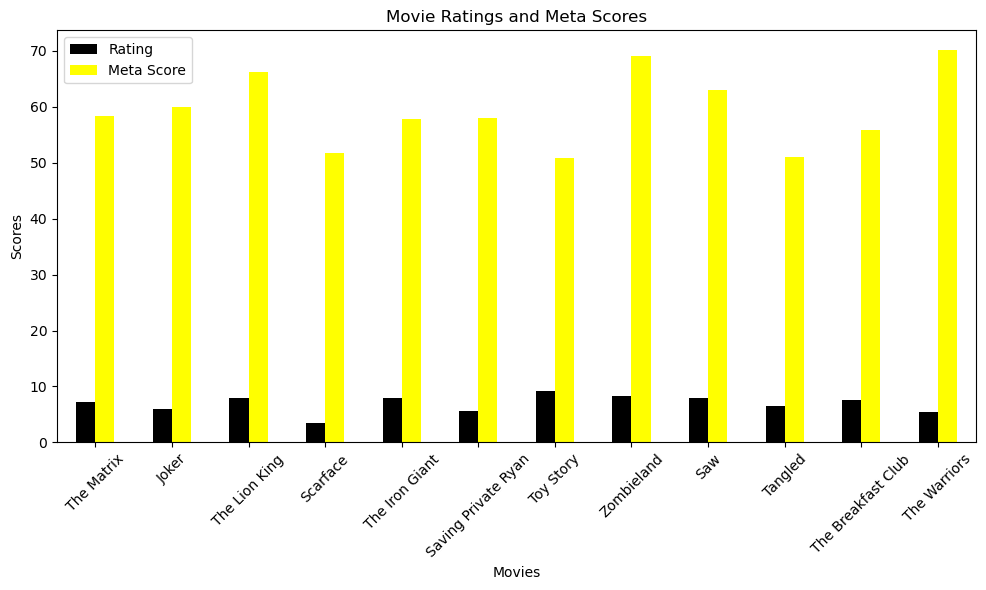

In [60]:
# Create a sample DataFrame with movie names, runtimes, genres, ratings, and meta scores
data = {
    'Movie': ['The Matrix', 'Joker', 'The Lion King', 'Scarface', 'The Iron Giant', 'Saving Private Ryan', 'Toy Story', 'Zombieland', 'Saw', 'Tangled', 'The Breakfast Club', 'The Warriors', ],
    'Runtime': [136, 122, 88, 170, 86, 169, 81, 88, 103, 100, 97, 92,], # runtime in minutes
    'Genre': ['Action', 'Drama', 'Adventure', 'Crime', 'Animation', 'Drama', 'Animation', 'Adventure', 'Horror', 'Animation', 'Comedy', 'Action', ],  # genres
}

df = pd.DataFrame(data)

# Define a simple rule to calculate ratings based on runtime
def calculate_rating(runtime):
    if runtime < 90:
        return np.random.uniform(7, 10)  # Short movies might get higher ratings
    elif 90 <= runtime < 150:
        return np.random.uniform(5, 8)  # Moderate length movies get moderate ratings
    else:
        return np.random.uniform(3, 6)  # Long movies might get lower ratings

# Define a simple rule to calculate meta score based on genre and runtime
def calculate_meta_score(genre, runtime):
    base_score = np.random.uniform(50, 70)
    
    # Genre influence on Meta Score
    if genre == 'Action':
        base_score += 5
    elif genre == 'Drama':
        base_score += 3
    elif genre == 'Sci-Fi':
        base_score += 7
    elif genre == 'Comedy':
        base_score -= 3
    elif genre == 'Thriller':
        base_score += 4
    
    # Reduce meta score for longer runtimes
    if runtime > 150:
        base_score -= 10
    
    return np.clip(base_score, 0, 100)  # Ensure the score is between 0 and 100

# Apply the rating function to the dataframe
df['Rating'] = df['Runtime'].apply(calculate_rating)

# Apply the meta score function to the dataframe
df['Meta Score'] = df.apply(lambda row: calculate_meta_score(row['Genre'], row['Runtime']), axis=1)

# Create a bar chart comparing Rating and Meta Score for each movie
ax = df.set_index('Movie')[['Rating', 'Meta Score']].plot(kind='bar', figsize=(10, 6), color=['black', 'yellow'])

# Add labels and title
plt.title('Movie Ratings and Meta Scores')
plt.xlabel('Movies')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

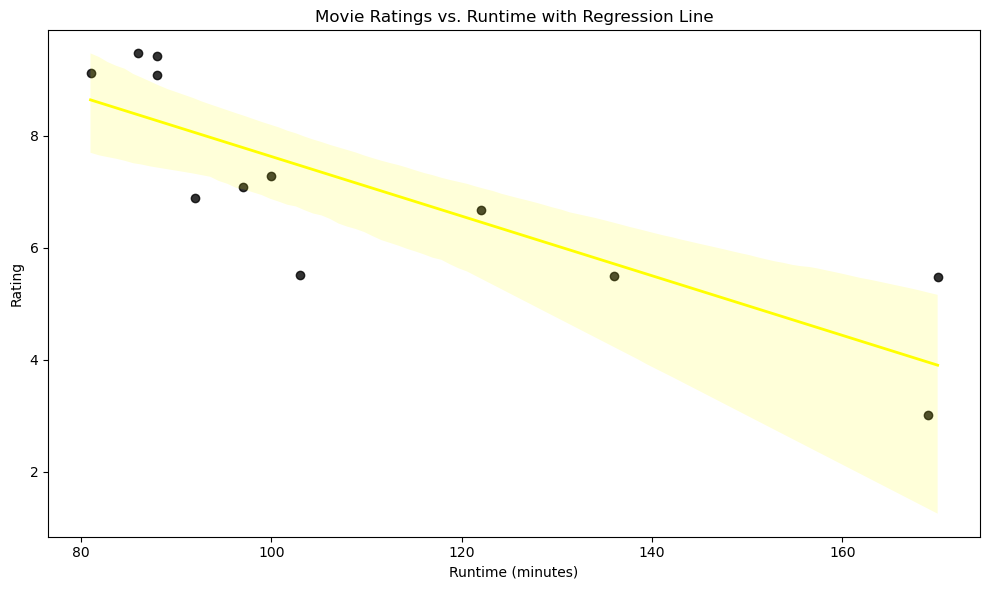

In [63]:
# Create a sample DataFrame with movie names, runtimes, genres, ratings, and meta scores
data = {
    'Movie': ['The Matrix', 'Joker', 'The Lion King', 'Scarface', 'The Iron Giant', 'Saving Private Ryan', 'Toy Story', 'Zombieland', 'Saw', 'Tangled', 'The Breakfast Club', 'The Warriors', ],
    'Runtime': [136, 122, 88, 170, 86, 169, 81, 88, 103, 100, 97, 92,], # runtime in minutes
    'Genre': ['Action', 'Drama', 'Adventure', 'Crime', 'Animation', 'Drama', 'Animation', 'Adventure', 'Horror', 'Animation', 'Comedy', 'Action', ],  # genres
}

df = pd.DataFrame(data)

# Define a simple rule to calculate ratings based on runtime
def calculate_rating(runtime):
    if runtime < 90:
        return np.random.uniform(7, 10)  # Short movies might get higher ratings
    elif 90 <= runtime < 150:
        return np.random.uniform(5, 8)  # Moderate length movies get moderate ratings
    else:
        return np.random.uniform(3, 6)  # Long movies might get lower ratings

# Apply the rating function to the dataframe
df['Rating'] = df['Runtime'].apply(calculate_rating)

# Create a scatter plot and add a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Runtime', y='Rating', data=df, scatter_kws={'color': 'black'}, line_kws={'color': 'yellow', 'linewidth': 2})

# Add labels and title
plt.title('Movie Ratings vs. Runtime with Regression Line')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')

# Display the plot
plt.tight_layout()
plt.show()

In [67]:
# T-Test created below

In [64]:
# Create a sample DataFrame with movie names, runtimes, genres, and ratings
data = {
    'Movie': ['The Matrix', 'Joker', 'The Lion King', 'Scarface', 'The Iron Giant', 'Saving Private Ryan', 'Toy Story', 'Zombieland', 'Saw', 'Tangled', 'The Breakfast Club', 'The Warriors', ],
    'Runtime': [136, 122, 88, 170, 86, 169, 81, 88, 103, 100, 97, 92,], # runtime in minutes
    'Genre': ['Action', 'Drama', 'Adventure', 'Crime', 'Animation', 'Drama', 'Animation', 'Adventure', 'Horror', 'Animation', 'Comedy', 'Action', ],  # genres
}

df = pd.DataFrame(data)

# Define a simple rule to calculate ratings based on runtime
def calculate_rating(runtime):
    if runtime < 90:
        return np.random.uniform(7, 10)  # Short movies might get higher ratings
    elif 90 <= runtime < 150:
        return np.random.uniform(5, 8)  # Moderate length movies get moderate ratings
    else:
        return np.random.uniform(3, 6)  # Long movies might get lower ratings

# Apply the rating function to the dataframe
df['Rating'] = df['Runtime'].apply(calculate_rating)

# Split the data into two groups based on runtime: short (<90) and long (>=90)
short_runtime = df[df['Runtime'] < 90]['Rating']
long_runtime = df[df['Runtime'] >= 90]['Rating']

# Perform a t-test to compare the means of the two groups
t_stat, p_value = stats.ttest_ind(short_runtime, long_runtime)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The difference between the ratings of short and long runtime movies is statistically significant.")
else:
    print("There is no statistically significant difference between the ratings of short and long runtime movies.")

T-statistic: 3.6953811610774716
P-value: 0.004139919986212696
The difference between the ratings of short and long runtime movies is statistically significant.


In [69]:
# Pie Chart Examples

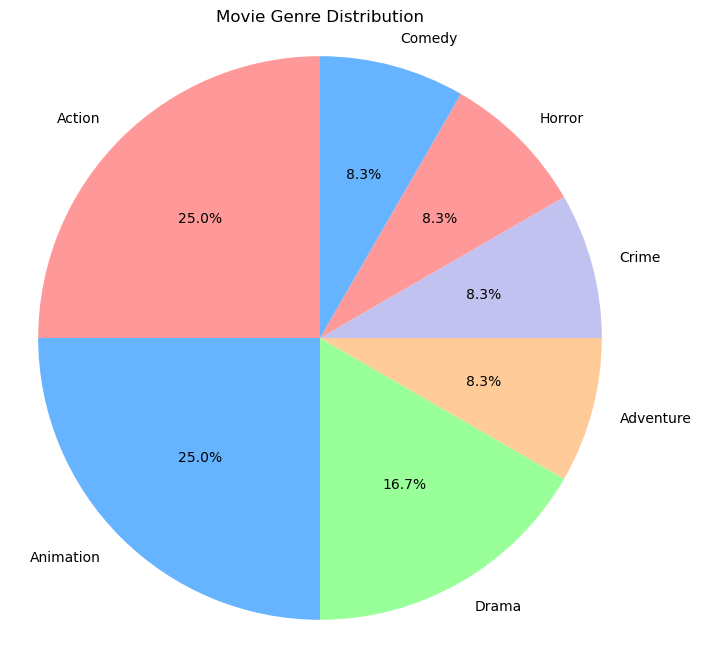

In [70]:
# Cleaned dataset (example)
data = {
    'Movie': ['The Matrix', 'Joker', 'The Lion King', 'Scarface', 'The Iron Giant', 
              'Saving Private Ryan', 'Toy Story', 'Zombieland', 'Saw', 'Tangled', 
              'The Breakfast Club', 'The Warriors'],
    'Runtime': [136, 122, 88, 170, 86, 169, 81, 88, 103, 100, 97, 92],  # runtime in minutes
    'Genre': ['Action', 'Drama', 'Adventure', 'Crime', 'Animation', 'Drama', 'Animation', 
              'Horror', 'Animation', 'Comedy', 'Action', 'Action'],  # genres
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate ratings based on runtime
def calculate_rating(runtime):
    if runtime < 90:
        return np.random.uniform(7, 10)  # Short movies might get higher ratings
    elif 90 <= runtime < 150:
        return np.random.uniform(5, 8)  # Moderate length movies get moderate ratings
    else:
        return np.random.uniform(3, 6)  # Long movies might get lower ratings

# Apply the rating function to the dataframe
df['Rating'] = df['Runtime'].apply(calculate_rating)

# Create a pie chart of genre distribution
genre_counts = df['Genre'].value_counts()  # Count the occurrences of each genre

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Movie Genre Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()